In [24]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd
from eod import stations_cc

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [25]:
def read_dic(dic70):
    alog = dic70['area']
    log=np.log10(alog)
    drain = dic70['rain']

    thresh = np.squeeze(dic70['thresh'])
    rthresh = np.array([thresh]*500).transpose()

    ok = np.where(~np.isnan(drain))
    drain70=drain[ok]
    alog70 = alog[ok]
    log70 = log[ok]
    dthresh70 = rthresh.copy()[ok]

    nok = np.where(~np.isfinite(log70))

    log70[nok]=0.
    cent = np.arange(20,100,20)
    iscent=[1000]
    for c in cent:
        p=np.percentile(dic70['area'][dic70['area']>=1000],c)
        iscent.append(p)

    sizes = np.array(iscent)
    print(iscent)

    ll = []
    area = []
    nb = []
    center = sizes[0:-1] + (sizes[1::] - sizes[0:-1]) / 2
   
    for ind, siz in enumerate(sizes):
       
        if siz == 1000:
            continue
        
        pos = np.where((alog70 <= siz) & (alog70 >= sizes[ind-1]))
        aarea = alog70[pos]
        ptresh = drain70[pos]
        ttresh = dthresh70[pos]
        prob=np.sum(ptresh>ttresh)
    
        ll.append(prob)
        area.append(np.sum(aarea))
        nb.append(ptresh.size)
    return(np.array(ll), np.array(area), np.array(nb), np.array(center))   

In [26]:
dic70 = stations_cc.readStation(70)
dic40 = stations_cc.readStation(40)
dic60 = stations_cc.readStation(60)
f70 = read_dic(dic70)
f40 = read_dic(dic40)
f60 = read_dic(dic60)

[1000, 7975.0000000000009, 23131.200000000004, 44148.799999999996, 80344.200000000012]
[1000, 96660.400000000009, 179553.0, 268742.0, 401591.0]
[1000, 25524.800000000003, 60567.400000000016, 104316.0, 172052.60000000003]


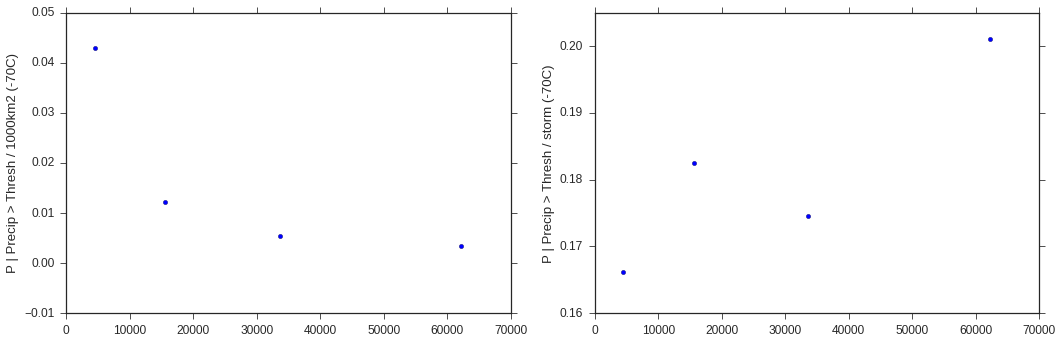

In [27]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,5), dpi=400)
ax = f.add_subplot(121)
plt.scatter(f70[3], f70[0]/(f70[1]/1000))
plt.ylabel("P | Precip > Thresh / 1000km2 (-70C)" )
ax = f.add_subplot(122)
plt.scatter(f70[3], f70[0]/f70[2])
plt.ylabel("P | Precip > Thresh / storm (-70C)" )
plt.tight_layout()
# ax = f.add_subplot(223)
# plt.scatter(np.log10(center), ll/(area/1000))
# plt.ylabel("P | Precip > Thresh / 1000km2 (-40C)" )
# plt.tight_layout()
# ax = f.add_subplot(224)
# plt.scatter(np.log10(center), ll/nb)
# plt.ylabel("P | Precip > Thresh / storm (-40C)" )
plt.tight_layout()
#plt.savefig(path+'70C_areabins.png')

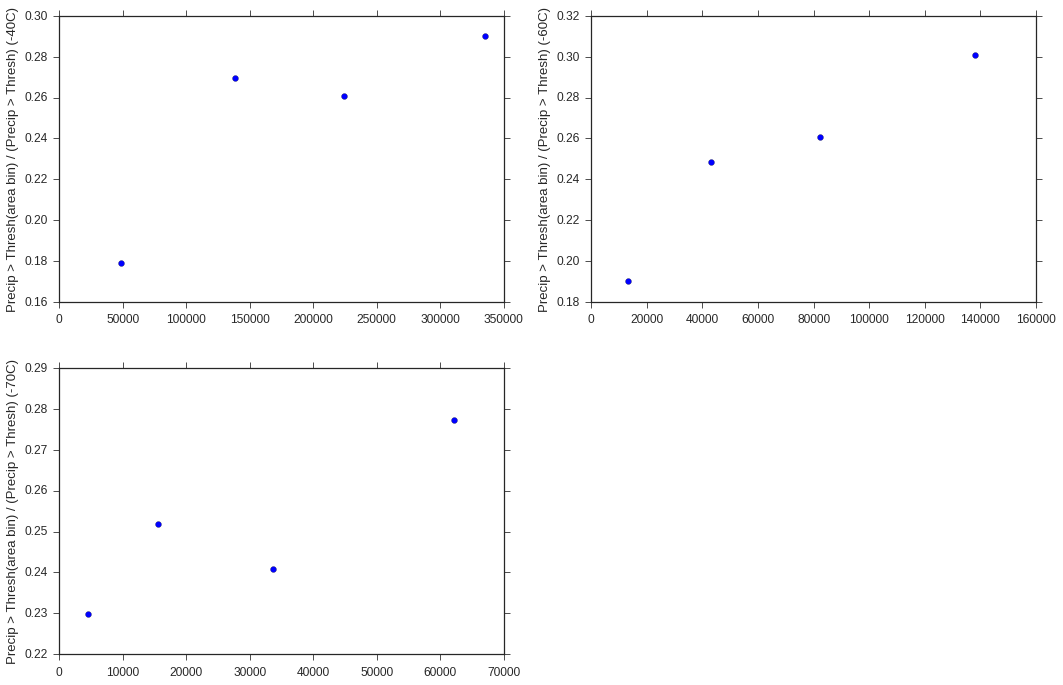

In [28]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.scatter(f40[3], f40[0]/np.sum(f40[0]), s=35)
plt.ylabel("Precip > Thresh(area bin) / (Precip > Thresh) (-40C)" )

ax = f.add_subplot(222)
plt.scatter(f60[3], f60[0]/np.sum(f60[0]), s=35)
plt.ylabel("Precip > Thresh(area bin) / (Precip > Thresh) (-60C)" )

ax = f.add_subplot(223)
plt.scatter(f70[3], f70[0]/np.sum(f70[0]), s=35)
plt.ylabel("Precip > Thresh(area bin) / (Precip > Thresh) (-70C)" )


plt.tight_layout()
plt.savefig(path+'areabins.png')

In [23]:
a = [1,2,3]
b = [2,4,5]

[a,b]

[[1, 2, 3], [2, 4, 5]]